Name: Shreyas Namjoshi

PGID: 12110103

Email: shreyas_namjoshi_ampba2022s@isb.edu

Q1] Do you need to standardize the data before applying any clustering
technique? Why or why not? 

Answer] 
Yes We need to standardize the date before applying any clustering Technique.Standardization is applied before any clustering technique to get more effective results. While clustering the data one or more attributes can affect the entire clusters because of the units and the values that the attributes have. Thus it is important that we bring all the attributes on one scale so that we compare all the attributes that are on similar scale. This Process brings all variables on similar scale and eliminates redundancy and noisy objects,thus improving accuracy of the results.

Q2] Apply hierarchical clustering with Euclidean distance and Ward’s
method. How many clusters do appear? 

In [327]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [328]:
import random

random.seed(10)

In [329]:
#Reading the dataset from the local directory
input = pd.read_csv("EastWestAirlinesCluster.csv")
input.columns = input.columns.str.replace(' ', '_')
input.shape
input.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [330]:
## exclude the column with ID
mydata = input.iloc[::,1:]
mydata

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [331]:
#Creating dummy Variables for CC1,CC2 and CC3 columns
input_dummies = pd.get_dummies(mydata, columns=['cc1_miles','cc2_miles','cc3_miles'])
input_dummies

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles_1,cc1_miles_2,...,cc1_miles_4,cc1_miles_5,cc2_miles_1,cc2_miles_2,cc2_miles_3,cc3_miles_1,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,28143,0,174,1,0,0,7000,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,19244,0,215,2,0,0,6968,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,41354,0,4123,4,0,0,7034,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,14776,0,500,1,0,0,6952,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,97752,0,43300,26,2077,4,6935,1,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3995,64385,0,981,5,0,0,1395,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3996,73597,0,25447,8,0,0,1402,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3997,54899,0,500,1,500,1,1401,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [332]:
from sklearn import preprocessing
input_dummies_norm=input_dummies_test.iloc[:,:7]
normalized_data = preprocessing.StandardScaler().fit_transform(input_dummies_norm)

In [333]:
normalized_data = pd.DataFrame(normalized_data,columns=['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll'])
normalized_data

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [334]:
finalDataFrame=normalized_data.join(input_dummies_test.iloc[:,7:])

In [335]:
finalDataFrame

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles_1,cc1_miles_2,...,cc1_miles_4,cc1_miles_5,cc2_miles_1,cc2_miles_2,cc2_miles_3,cc3_miles_1,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,1,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0,1,0,...,0,0,1,0,0,1,0,0,0,0


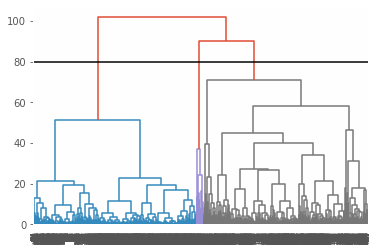

In [337]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(finalDataFrame, 'ward', 'euclidean')
plt.figure()
plt.axhline(y=80, c='k')
dn = hierarchy.dendrogram(Z)

As a rule of thumb,we look for the clusters with the longest ‘branches’, the shorter they are, the more similar they are to following ‘twigs’ and ‘leaves’.
But the optimal number will also depend on the context and business case.
Here We will go by the rule of thumb.We can see that the longest branch is red in color.So we are cutting the dendogram at y=80 i.e dividing into 3 clusters.

Since we cut the dendogram at y=80, we know that three cluster are falling off.So lets get the cluster data and add it to the actual data, so that we know which record belong to what cluster

In [338]:
from scipy import cluster
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=3)

In [339]:
membership = pd.DataFrame(cutree)

In [340]:
input["Cluster_ID"] = membership

Q3] Compare cluster centroids to characterize different clusters and try to give each cluster a label—a meaningful name that characterizes the cluster.

In [341]:
print('Count in Cluster 1: ',len(input.loc[input["Cluster_ID"]==0,]))
print('Count in Cluster 2: ',len(input.loc[input["Cluster_ID"]==1,]))
print('Count in Cluster 3: ',len(input.loc[input["Cluster_ID"]==2,]))

Count in Cluster 1:  1954
Count in Cluster 2:  1956
Count in Cluster 3:  89


In [342]:
#Finding Cluster Centroids
input.groupby('Cluster_ID').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean','Bonus_miles':'mean','Bonus_trans':'mean','Flight_miles_12mo':'mean','Flight_trans_12':'mean','Days_since_enroll':'mean','Award?':'mean'}).transpose()

Cluster_ID,0,1,2
Balance,35030.279939,108385.222904,155966.808989
Qual_miles,4.002047,272.638037,395.662921
cc1_miles,1.001535,3.094581,2.539326
cc2_miles,1.022518,1.004090,1.067416
cc3_miles,1.000512,1.023517,1.022472
Bonus_miles,2890.644831,30263.280675,41785.876404
Bonus_trans,5.323951,16.873722,33.573034
Flight_miles_12mo,155.788127,476.128323,6787.033708
Flight_trans_12,0.503582,1.398773,19.921348
Days_since_enroll,3697.303480,4506.609918,4838.865169


Interpretation:

From the hierarchical table, we can develop a profile for customers belonging to each cluster as follows -

Cluster 1 (Not-so-frequent Travellers): 
This Cluster represents 48.86% of all the customers.These customers have the lower flight miles eligible for award travel as compared to other other two clusters.Also the lower avg days since enrollment shows that these customer are new customers.These customers also have lesser bonus miles and flight miles as compared to other two clusters.

Cluster 2 (Loyal Customers):
This Cluster represents 48.91% of all customers .These customers have covered second highest numbers of miles using number of non-flight transactions(Bonus miles) in the past 12 months.These customers also have earned maximum number miles using Freq. Flier Credit card in the past 12 months,which may mean that these customers are more engaged with program.These customers have second largest numbers of qualifying miles for top flight status and thus this segment can be called as Loyal Customers Segment.These customers also have second largest average day since enrollment.


Cluster 3 (High Frequency Travelers):
This cluster represents 2.22% of all customers.They have the maximum number of miles counted as qualifying for Top Flight Status.These customer has also earned maximum number of miles from number of flight miles and they also have earned maximum number of miles from flight transaction in the past 12 months and largest number of miles from bonus miles.

Q4] To check the stability of clusters, remove a random 5% of the data (by
taking a random sample of 95% of the records), and repeat the analysis.
Does the same picture emerge? 

In [343]:
#Removal of 5% of data
sampleData = finalDataFrame.sample(frac=0.95)
sampleData

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles_1,cc1_miles_2,...,cc1_miles_4,cc1_miles_5,cc2_miles_1,cc2_miles_2,cc2_miles_3,cc3_miles_1,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
3041,-0.283798,-0.186299,-0.709992,-1.208203,-0.328603,-0.362168,-0.573671,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1910,2.084779,-0.186299,0.915819,2.853193,-0.185750,-0.098503,-0.070977,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3216,-0.345983,-0.186299,-0.583687,-0.895788,0.064244,0.165161,-1.037621,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1057,1.607391,-0.186299,-0.043020,0.353873,-0.328603,-0.362168,0.779437,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3057,-0.278141,-0.186299,0.251705,0.562149,-0.328603,-0.362168,-0.559142,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-0.461273,-0.186299,-0.709992,-1.208203,-0.328603,-0.362168,-0.720895,0,1,0,...,0,0,1,0,0,1,0,0,0,0
865,-0.345745,-0.186299,0.724996,0.145596,-0.328603,-0.362168,0.929083,1,0,0,...,1,0,1,0,0,1,0,0,0,0
1276,-0.718262,-0.186299,-0.709992,-1.208203,-0.328603,-0.362168,0.807526,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3428,-0.687874,-0.186299,-0.612675,-0.791649,0.207098,0.165161,-1.470093,0,1,0,...,0,0,1,0,0,1,0,0,0,0


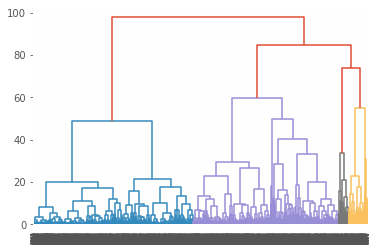

In [344]:
## Hierarchical Clustering
## Euclidean distance, Ward linkage

Y = hierarchy.linkage(sampleData, 'ward', 'euclidean')
plt.figure()
dn = hierarchy.dendrogram(Y)



Interpretation:

We can see that the dendogram is different if we remove 5% records from original data. But this is true for these set of records that we have got from sample function used. So if there is a sample whose characteristics can match with original data then dendogram can be similar. So it depends on the sample you get from the function that determines the dendogram and cluster chaaracteristics

Q5] Cluster all passengers again using k-means clustering. How many clusters
do you want to go with? How did you decide on the number of clusters?
Explain your choice on the number of clusters. 


Solution] In K Means Clustering we can decide on the number of clusters basis the Elbow Curve. This is decided on the basis of SSE change. We can assume that the point beyond which we see constant slope to be optimal number of cluster. But It again depends on the business case.Here we will choose optimal point basis Elbow curve.

In [345]:
from sklearn.cluster import KMeans

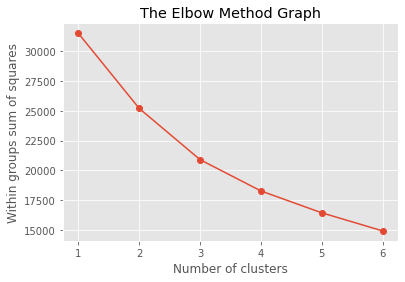

In [346]:
## Determine number of clusters
Cluster_Variability = []
for i in range(1,7): 
    kmeans =  KMeans(n_clusters=i).fit(finalDataFrame)
    Cluster_Variability.append(kmeans.inertia_)
#Plot the elbow graph
plt.plot(range(1,7),Cluster_Variability,marker='o')
plt.title('The Elbow Method Graph')
plt.xticks(range(1,7))
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

We see that minimal change in slope occurs after k=3 and its almost constant after cluster #3 ,so we will take K as 3.

In [347]:
fit = KMeans(n_clusters=3, max_iter = 10, random_state=0).fit(finalDataFrame)

In [348]:
fit.labels_  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.cluster_centers_ # A matrix of cluster centres.
fit.n_iter_ # The number of (outer) iterations.
fit.inertia_ # Total within-cluster sum of squares, i.e. sum(withinss).

20895.321276008908

In [349]:
mydata

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [350]:
mydata['ClusterID']=fit.labels_
mydata

<ipython-input-350-fb38f0463801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['ClusterID']=fit.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [351]:
print('Count in Cluster 1: ',len(mydata.loc[newData1["ClusterID"]==0,]))
print('Count in Cluster 2: ',len(mydata.loc[newData1["ClusterID"]==1,]))
print('Count in Cluster 3: ',len(mydata.loc[newData1["ClusterID"]==2,]))

Count in Cluster 1:  158
Count in Cluster 2:  2673
Count in Cluster 3:  1168


Q6]How do the characteristics of the clusters, obtained in Part (e), contrast
or validate the finding in Part c above?

In [352]:
#Aggregating columns on K Means clusters
print("K-Clust")
mydata.groupby('ClusterID').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean','Bonus_miles':'mean','Bonus_trans':'mean','Flight_miles_12mo':'mean','Flight_trans_12':'mean','Days_since_enroll':'mean','Award?':'mean'}).transpose()

K-Clust


ClusterID,0,1,2
Balance,111606.295425,38303.369042,197660.835165
Qual_miles,147.063399,94.840402,738.500000
cc1_miles,3.401307,1.138610,2.351648
cc2_miles,1.009804,1.016178,1.032967
cc3_miles,1.028758,1.000000,1.027473
Bonus_miles,34704.335948,3777.080017,37507.824176
Bonus_trans,18.324183,5.822475,27.714286
Flight_miles_12mo,301.612418,193.913424,5136.351648
Flight_trans_12,0.901307,0.597289,15.098901
Days_since_enroll,4909.418954,3539.071272,4751.934066


In [353]:
#Aggregating columns on Hierarchial clusters
print("H-Clust")
input.groupby('Cluster_ID').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean','Bonus_miles':'mean','Bonus_trans':'mean','Flight_miles_12mo':'mean','Flight_trans_12':'mean','Days_since_enroll':'mean','Award?':'mean'}).transpose()

H-Clust


Cluster_ID,0,1,2
Balance,35030.279939,108385.222904,155966.808989
Qual_miles,4.002047,272.638037,395.662921
cc1_miles,1.001535,3.094581,2.539326
cc2_miles,1.022518,1.004090,1.067416
cc3_miles,1.000512,1.023517,1.022472
Bonus_miles,2890.644831,30263.280675,41785.876404
Bonus_trans,5.323951,16.873722,33.573034
Flight_miles_12mo,155.788127,476.128323,6787.033708
Flight_trans_12,0.503582,1.398773,19.921348
Days_since_enroll,3697.303480,4506.609918,4838.865169


From the above tables,it is evident that by applying different clustering techniques we get different cluster characteristics.
For K Means:
Cluster 1: Loyal Customers
Cluster 2: Not so frequent travellers
Cluster 3: High Frequency Travellers

For Hierarchial Cluster:
Cluster 1: Not so frequent travellers
Cluster 2: Loyal Customers
Cluster 3: High Frequency Travellers

1. The Major Characteristics changes are occurring for Qual Miles, Balance and bonus miles between the two clustering techniques.
2. Balance for Not for Frequent Travellers,Loyal CUstomers and High Frequent Travellers in higher in K Means clustering
3. Qual Miles appears to be more balanced in Hierarchial clustering as compared to K Means clustering. In K Means Clustering the values appear to be extreme in case of Frequent Travellers
4. Days Since enroll for Not so frequent customers are higher in Hierarchial clustering while for Loyal Customers and Frequent Travellers it is higher in K Means.



In [354]:
#Putting each cluster output to the single file

writer = pd.ExcelWriter('ClusterOutput_Assignment_12110103.xlsx', 
                          engine ='xlsxwriter')
  
# Write each dataframe to a different worksheet.
input.to_excel(writer, sheet_name ='HierarchialClusteringOutput')
mydata.to_excel(writer, sheet_name ='KMeansClusteringOutput')

  
# Close the Pandas Excel writer object
# and output the Excel file.
writer.save()

Q7] Which cluster(s) would you target for offers, and what type of offers
would you target to customers in that cluster? Include proper reasoning
in support of your choice of the cluster(s) and the corresponding offer(s). 

We are taking Hierarchial Clustering since they appear to be more stable as compared to KMeans Clustering.As per our Observations in clustering analysis(Hierarchial Clustering), we propose following marketing campaigns to target specific segments.Below are the recommendations.

Not So Frequent Fliers Segment: This segment has 48% of number of customers and there is a potential business growth opportunity if these customers turns into High Frequency Category.

1. Increase the number of miles to 2X if using freq flyer Credit Card for travel bookings
2. Giving these customers discounts and increase on miles earned to 1.5X on using freq flyer Credit Cards on foods and beverages booked while booking flights and on flight purchases.
3. Offer complete miles redemption on booking flights on select routes
4. Complimentary Check In if air tickets are booked using Freq Flyer credit card.

Loyal Customers: These Segment also has approximately the same number of customers as Not So Frequent Fliers customers and there are high chances they can use the program better since they have fair idea of about the Program if we provide these customers with incentives.These customers use the program more for non flight transactions

1. Increase the number of miles to 1.5X if using freq flyer credit card for travel bookings and additonal miles upto 0.5X of the
   seat selection price.
2. Offer upto 90% miles redemption from the accumulated flight miles on flight bookings.

High Frequency Customers: These segment has lesser number of people and are already using most of the benefits of the program and they know the program very well.So we are not proposing any recommendation for this category.



